# CASE STUDY ON AIRBNB DB 2019

## Importing libraries


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from IPython.display import HTML, display # displaying maps in the notebook
import seaborn as sns; sns.set() # graphing data

import warnings # ignoring the warning
warnings.simplefilter(action='ignore', category=Warning) # disabling all warnings produces the same output

import array # array

from wordcloud import WordCloud  # generating word clouds from text

## Dragging up the dataset

In [2]:
main_df = pd.read_csv('AB_NYC_2019 2.csv')
main_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


Each column in the dataframe gives us information about the property:-

- The host chooses the name of the property, and host id and host name are the host's Airbnb identifying numbers.
- The neighbourhood group, as shown above, consists of five groups.
- The neighbourhood identifies the exact neighbourhood within the group to which the property belongs, while the latitude and longitude provide the precise location's coordinates.
- Using Folium, we can utilise this to map every site. Room type identifies the type of room the property has, and price will be the characteristic we attempt to forecast. Minimum nights are the minimum number of nights that must be reserved for the property, while number of reviews, last review, and reviews per month provide details on its reviews.
- We regret not having the genuine ratings or reviews.

Let's look at some fundamental data:

We wish to sample data for graphing because there are around 50k entries. For certain areas, data appears to be missing, most notably those pertaining to the number of reviews.

## Understanding the dataset


In [17]:
main_df.shape #.shape() used to fetch the dimensions of Pandas and NumPy type objects in python

(48895, 16)

## Data Wrangling and Cleaning


In [20]:
# Understanding types
#print(main_df.info()) prints information about the DataFrame
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [22]:
main_df.isnull().sum() #.isnull().sum() returns the number of missing values in the dataset.

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As a result, we can observe that the last review and review per month columns have about 10k null values, but name and host name have far less null values.

In [25]:
main_df.describe() #.descrive() returns description of the data in the DataFrame

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- From this we can see the mean price to be around 152 dollars.

- Average availablity of an airbnb around a year is 112 days.

In [27]:
# Insight about unique values
main_df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

Notable that we have 5 locations in dataset and 3 room types.

In [30]:
# Making sure if any duplicatd values.
main_df.duplicated().sum() 
#duplicated() returns a Series with True and False values that describe which rows in the DataFrame are duplicated and not.

0

We do not have any duplicate rows in our dataset.

In [31]:
print("Neighbourhood Groups:", main_df['neighbourhood_group'].unique().tolist())
print("Room Types:", main_df['room_type'].unique().tolist())

Neighbourhood Groups: ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Room Types: ['Private room', 'Entire home/apt', 'Shared room']


We'll be collaborating with Airbnb hosts in New York City's five boroughs. Shared rooms, private rooms, or the complete house or apartment are the three different sorts of rooms. If individuals prefer having their full home to themselves rather than sharing a room, we may anticipate that the rooms will have a considerable influence on the price. As a result, homeowners will probably charge more. Later, we shall examine this.

How about the cost? Let's look at the average pricing of our Airbnbs as well as the characteristics of the outliers.

In [33]:
print(main_df['price'].describe(percentiles=[.25, .50, .75, .95]))

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
95%        355.000000
max      10000.000000
Name: price, dtype: float64


We find that there are some very large outliers, so for visualization purposes, we winsorize (ignore) the top 5% of data, about $400.

# Data Exploration

Let's display our data now that we have seen the data we are dealing with in order to better comprehend it.

We'll look at some geographic information first:

- How many rooms are there in each borough?
- What is the breakdown of hotel rates by borough?
- How frequently and expensively are different types of rooms offered?

## Data Analysis and Visualization


### Host ID


In [35]:
main_df.host_id.value_counts().iloc[:5]

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

<AxesSubplot:>

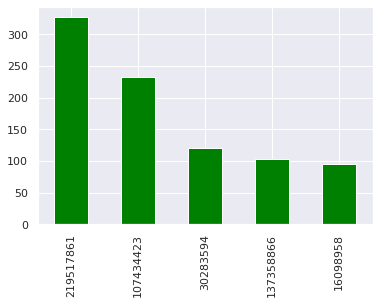

In [124]:
main_df.host_id.value_counts().iloc[:5].plot(kind = 'bar', color = 'green')

We can observe that the highest times transaction done by a customer is 327 in the year 2019.

## Neighbourhood Groups


We'll start by examining the neighbourhood associations and the areas where Airbnbs are most frequently found. We'll also examine their pricing inside each neighbourhood category. Seaborn allows us to create some lovely sights.

In [158]:
room_types = main_df['room_type'].unique()
print(room_types)

['Private room' 'Entire home/apt' 'Shared room']


In [156]:
# There are 5 particular neighbourhood_group, which means 5 unique locations.
main_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

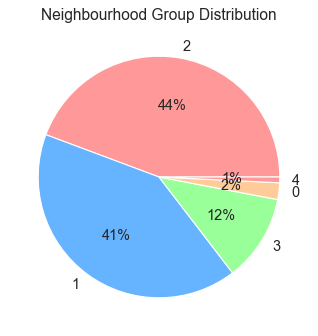

In [284]:
fig = plt.figure(figsize=(5,5), dpi=80)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'] # set custom colors
main_df['neighbourhood_group'].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=360, fontsize=13, colors=colors, labels=main_df['neighbourhood_group'].value_counts().index)
plt.title('Neighbourhood Group Distribution', fontsize=14)
plt.ylabel('')
plt.show()


With 44% of the whole dataset, Manhattan has seen the most Airbnb transactions. Just 1% of incidents occurred in Staten Island. Brooklyn accounted for 41% of trades, while Queens and the Bronx each had 12% and 2%.

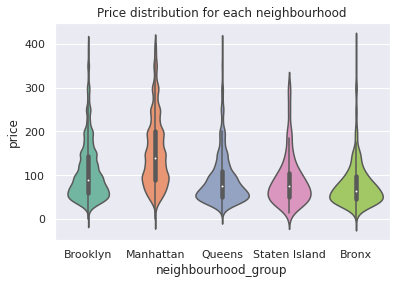

In [134]:
# we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

# creating a sub-dataframe with no extreme values / less than 400
winsorized_df = main_df[main_df.price < 400]

# using violinplot to showcase density and distribtuion of prices 
# Set a color palette
palette = sns.color_palette("Set2")

# Create the violin plot
viz_2 = sns.violinplot(data=winsorized_df, x='neighbourhood_group', y='price', palette=palette)

# Set the title
viz_2.set_title('Price distribution for each neighbourhood')

# Show the plot
plt.show()

As anticipated, shared rooms are the least expensive on average, while full homes are the most expensive. Despite the fact that private rooms and shared rooms appear to be more oriented around their means, all room categories appear to have a comparable distribution. For complete homes, there is a greater price difference.

## Neighbourhoods

In [94]:
main_df['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [96]:
main_df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

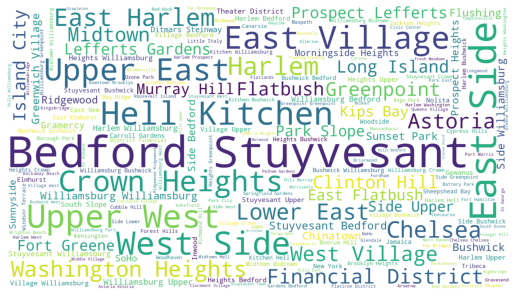

In [5]:
plt.subplots(figsize=(9,9))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(main_df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

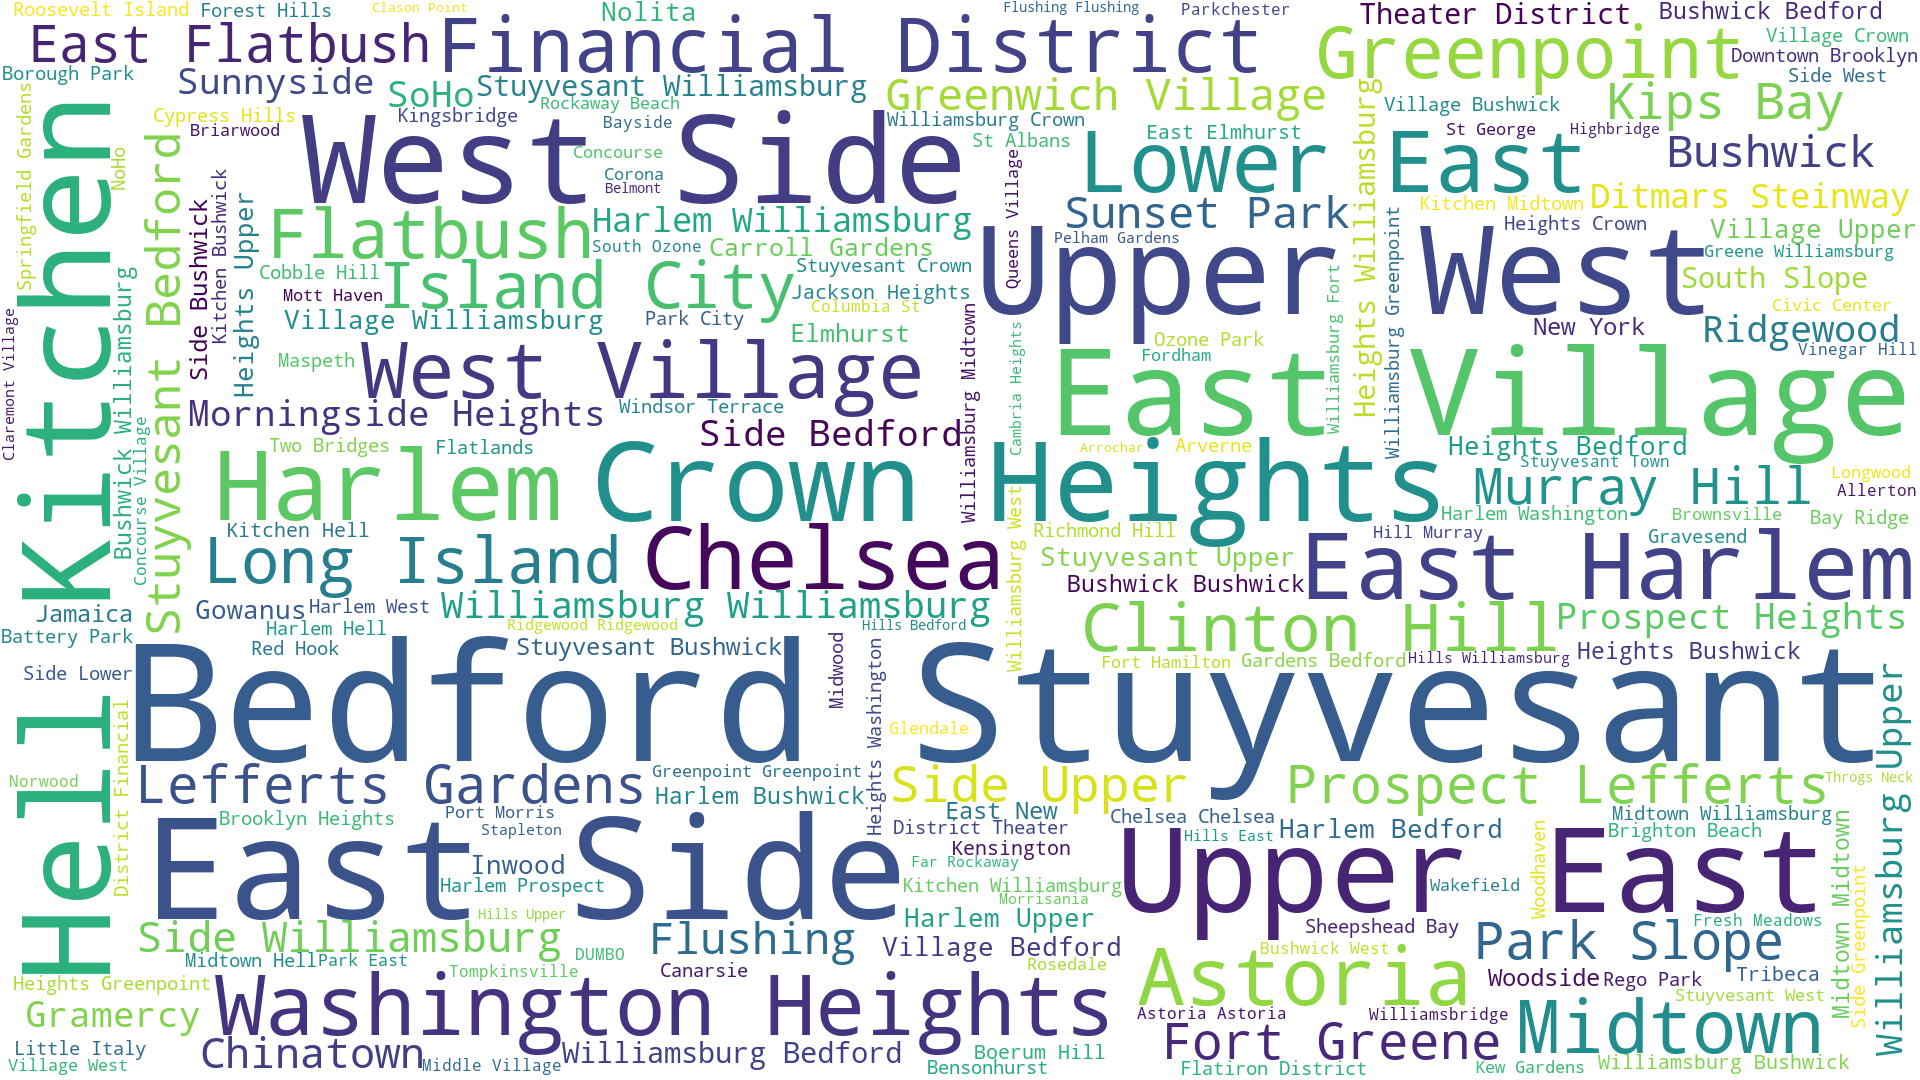

In [9]:
wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(' '.join(main_df.neighbourhood))
wordcloud.to_image()


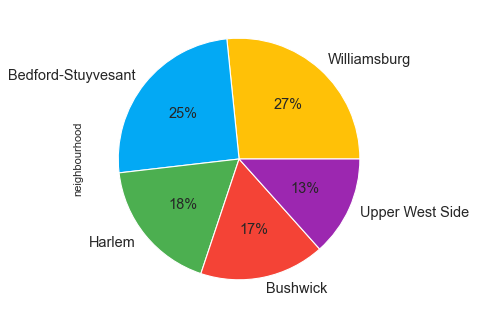

In [8]:
# Set a color palette
colors = ['#FFC107', '#03A9F4', '#4CAF50', '#F44336', '#9C27B0']

# Create the pie chart
fig = plt.figure(figsize=(5,5), dpi=80)
main_df['neighbourhood'].value_counts().iloc[:5].plot(kind='pie', autopct='%1.0f%%', startangle=360, fontsize=13, colors=colors)

# Show the plot
plt.show()

We can observe that Williamsburg, then Bedford-Stuyvesant, is the location with the highest volume of transactions.

The top five regions in the dataset are displayed in this pie chart by percentage.

### Room Type


After examining the Airbnbs' locations, let's examine the different room categories and how their pricing distribution varies.

In [69]:
# we noted that the room_type is only of 3 particular types.
main_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

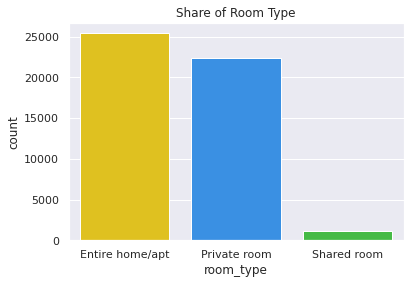

In [143]:
# using countplot once again
# Create a custom color palette with color names
palette = sns.color_palette(["gold", "dodgerblue", "limegreen"])

# Create the countplot
ax = sns.countplot('room_type', data=main_df, order=main_df['room_type'].value_counts().index, palette=palette)
ax.set_title('Share of Room Type')

# Show the plot
plt.show()

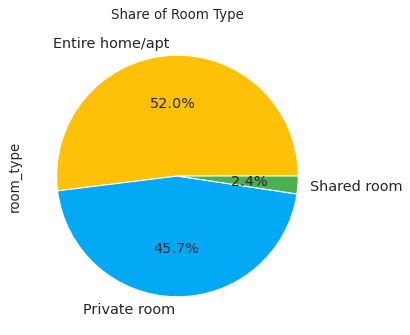

In [144]:
# Set a color palette
colors = ['#FFC107', '#03A9F4', '#4CAF50']

# Create the pie chart
fig = plt.figure(figsize=(5,5), dpi=80)
main_df['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=360, fontsize=13, colors=colors)

# Set the title
plt.title('Share of Room Type')

# Show the plot
plt.show()

It's interesting to notice that in our sample, about 25k individuals (52%) opt for a home, whereas 22k individuals (46%) opt for a private room. Only 1,000 (2%) persons select shared housing. This might indicate an increase in the number of individuals using Airbnb, whether alone or with family for vacations, trips, and other activities.

## Price

In [109]:
main_df.price.value_counts().iloc[:10]

100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: price, dtype: int64

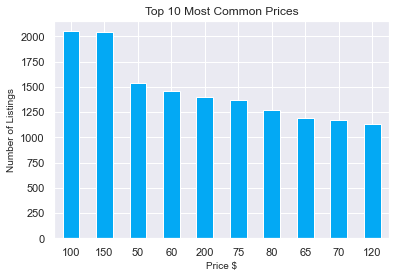

In [3]:
# Set a color for the bars
bar_color = '#03A9F4'

# Create the bar chart
main_df.price.value_counts().iloc[:10].plot(kind='bar', color=bar_color)
plt.xlabel('Price $')
plt.ylabel('Number of Listings')
plt.title('Top 10 Most Common Prices')
plt.xticks(rotation=0)

# Show the plot
plt.show()

Over 2,000 Airbnb listings cost between $100 and $150 apiece.

Prices for 1.5K Airbnbs are approximately $50.

In [19]:
main_df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The cost per item is around 152 dollars.

50% of the data cost more than 106 dollars.

The most expensive Airbnb costs roughly $10,000.

In [23]:
main_df[main_df['price'] == 10000.000000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,13-02-2016,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,27-07-2017,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


We have 3 airbnbs with 10k per night luxury stay, one private room and 2 home stay.



## Minimum Nights


In [25]:
print(main_df['minimum_nights'].value_counts())

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64


In [29]:
night_counts = main_df['minimum_nights'].value_counts().sort_index()
for night, count in night_counts.iteritems():
    print("Number of nights: ", night)
    print("Amount of transactions:", count)


Number of nights:  1
Amount of transactions: 12720
Number of nights:  2
Amount of transactions: 11696
Number of nights:  3
Amount of transactions: 7999
Number of nights:  4
Amount of transactions: 3303
Number of nights:  5
Amount of transactions: 3034
Number of nights:  6
Amount of transactions: 752
Number of nights:  7
Amount of transactions: 2058
Number of nights:  8
Amount of transactions: 130
Number of nights:  9
Amount of transactions: 80
Number of nights:  10
Amount of transactions: 483
Number of nights:  11
Amount of transactions: 33
Number of nights:  12
Amount of transactions: 91
Number of nights:  13
Amount of transactions: 54
Number of nights:  14
Amount of transactions: 562
Number of nights:  15
Amount of transactions: 279
Number of nights:  16
Amount of transactions: 18
Number of nights:  17
Amount of transactions: 14
Number of nights:  18
Amount of transactions: 28
Number of nights:  19
Amount of transactions: 8
Number of nights:  20
Amount of transactions: 223
Number of 

Text(0.5, 1.0, 'Top 4 Most Common Minimum Nights')

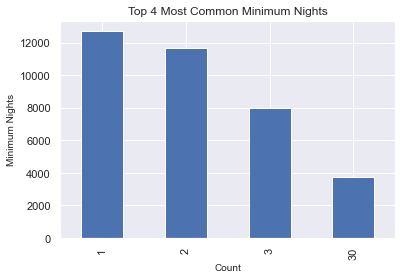

In [36]:
# Get the count of each unique value in the 'minimum_nights' column
# and select the top 4 most common values
top_nights = main_df['minimum_nights'].value_counts().head(4)

# Create a horizontal bar plot of the top_nights data
top_nights.plot(kind='bar')

# Set the x-axis label
plt.xlabel('Count')

# Set the y-axis label
plt.ylabel('Minimum Nights')

# Set the plot title
plt.title('Top 4 Most Common Minimum Nights')

We can see that the majority of the over 12,000 guests stayed at Airbnbs for one night.

75,000 choose for a three-night stay, while 11,00 select a two-night stay.

Around 3.7k people remained for a whole month.

## Number of reviews


In [57]:
main_df['number_of_reviews'].value_counts()


0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

Ten thousand AirBnBs are without reviews.

The maximum number of reviews for 5.2k is 607, and only 1 airbnb has that many reviews.

In [65]:
main_df[main_df['number_of_reviews'] == 607]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,21-06-2019,7.75,3,293


The Big Bedroom in Manhattan, which costs about 69 dollars, has the best evaluations.

## Availablity


In [74]:
# Select the 'availability_365' column from the DataFrame df
availability = main_df['availability_365']

# Count the number of occurrences of each unique value in the 'availability' Series
# and return the results as a new Series
counts = availability.value_counts()

# Print the resulting Series
print(counts)


0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64


Just about 1.3k Airbnbs offer 365-day availability, whereas the majority don't.

In [82]:
# Filter the rows of the DataFrame 'df' where the 'availability_365' column equals 365
# Calculate summary statistics for the filtered rows
main_df[main_df['availability_365'] == 365].describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.295000e+03,1.295000e+03,1295.000000,1295.000000,1295.000000,1295.00000,1295.000000,841.000000,1295.000000,1295.0
mean,1.940195e+07,8.554698e+07,40.729014,-73.943275,250.769884,19.60000,10.220849,0.832545,13.158301,365.0
std,1.197265e+07,8.786960e+07,0.057781,0.059799,550.497373,65.05093,22.095983,1.112493,36.224171,0.0
min,2.539000e+03,2.787000e+03,40.507080,-74.242850,20.000000,1.00000,0.000000,0.010000,1.000000,365.0
25%,8.725256e+06,8.931349e+06,40.687990,-73.983210,72.000000,1.00000,0.000000,0.130000,1.000000,365.0
50%,2.065068e+07,4.634351e+07,40.730990,-73.954270,125.000000,3.00000,2.000000,0.410000,2.000000,365.0
75%,3.027040e+07,1.565055e+08,40.762095,-73.921715,225.000000,30.00000,10.000000,1.000000,7.000000,365.0
max,3.648315e+07,2.733930e+08,40.893740,-73.721730,9999.000000,1250.00000,183.000000,8.940000,327.000000,365.0


Costliest airbnb with 365 days availablity costs around 10k dollars with average of 250 dollars.



### Reviews per month


In [89]:
# Filter the rows of a copy of DataFrame 'df_copy' where the 'reviews_per_month' column is greater than 1
filtered_df = main_df[main_df['reviews_per_month'] > 1]

# Count the number of occurrences of each unique value in the 'reviews_per_month' column of the filtered DataFrame
value_counts = filtered_df.reviews_per_month.value_counts()

# Calculate the sum of the value counts, which gives the total number of rows with 'reviews_per_month' greater than 1
total_count = value_counts.sum()

# Print the total count
print(total_count)


15908


15.9k reviews had a rating of 2.

In [94]:
# Filter the rows of the DataFrame 'df' where the 'reviews_per_month' column is greater than 1, and select only the 'reviews_per_month' column

main_df[main_df['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5]

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

Above 1, around 406 airbnbs have 2 reviews per month, 222 with 3 and 130 with 4.



In [97]:
# Find the maximum value in the 'reviews_per_month' column of DataFrame 'main_df'
main_df['reviews_per_month'].max()


58.5

In [100]:
# Filter the rows of the DataFrame 'df_copy' where the 'reviews_per_month' column has a value of 58.5
main_df[main_df['reviews_per_month'] == 58.5]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,07-07-2019,58.5,9,299


Enjoy great views in Manhattan has the highest reviews per month. They offer Private room and is worth 100 dollars a night.



## Calculate host listing


In [102]:
# Count the frequency of each value in the 'calculated_host_listings_count' column of the dataframe
main_df.calculated_host_listings_count.value_counts().iloc[:5]

1    32303
2     6658
3     2853
4     1440
5      845
Name: calculated_host_listings_count, dtype: int64

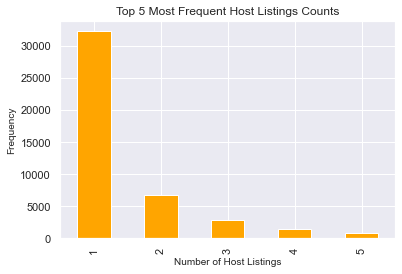

In [107]:
# Count the frequency of each value in the 'calculated_host_listings_count' column of the dataframe
host_listings_count = main_df['calculated_host_listings_count'].value_counts()

# Select the first 5 values with the highest frequency
top_host_listings_count = host_listings_count.head(5)

# Create a bar chart of the top 5 most frequent values
top_host_listings_count.plot(kind='bar', color='orange')

# Add x and y labels and a title to the chart
plt.xlabel('Number of Host Listings')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequent Host Listings Counts')

# Display the chart
plt.show()


Most hosts used the listings only once that is around 32.3k and 6.6k around 2 times.



In [109]:
# Calculate the descriptive statistics for the 'calculated_host_listings_count' column of the dataframe
main_df.calculated_host_listings_count.describe()


count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

A host uses listings 7 times on average.

Maximum repetitions are 327.

## Bivariate Analysis


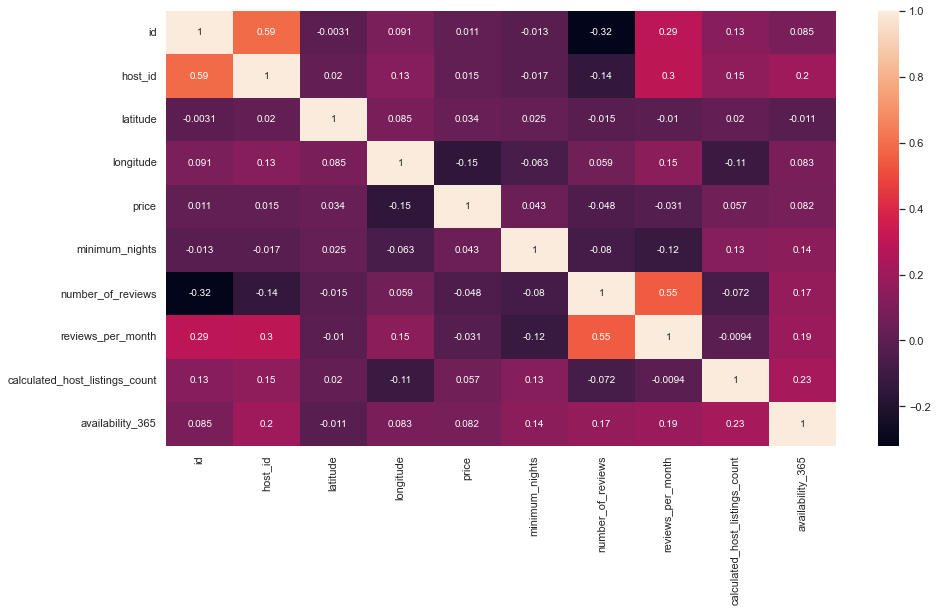

In [110]:
# Calculate the correlation matrix for the columns in the dataframe
corr = main_df.corr()

# Set the size of the heatmap figure
plt.figure(figsize=(15,8))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()


## Maps - Scatterplots


#### Latitude and Longitude with loaction


In [112]:
# Count the number of occurrences of each unique value in the 'neighbourhood_group' column
main_df['neighbourhood_group'].value_counts()


Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

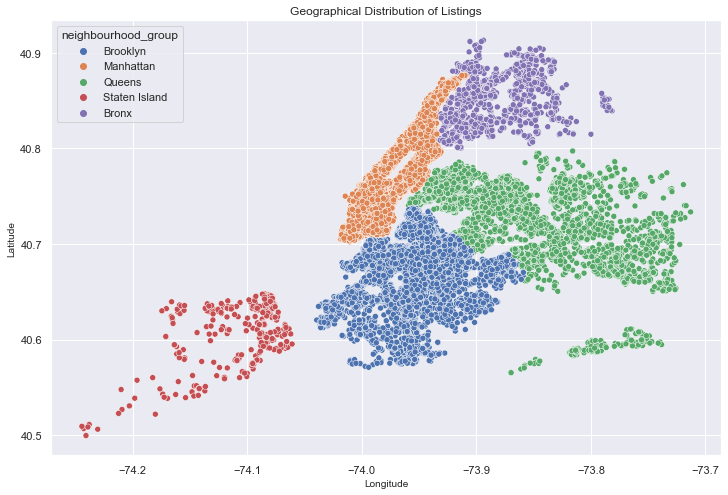

In [122]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(x=main_df.longitude, y=main_df.latitude, hue=main_df.neighbourhood_group)

# Add labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Listings')
plt.show()

This shows us the dataset distribution in NewYork city with respect to latitude and longitude.



#### Latitude and Longitude with room type


In [129]:
# Count the unique values in the 'room_type' column
main_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

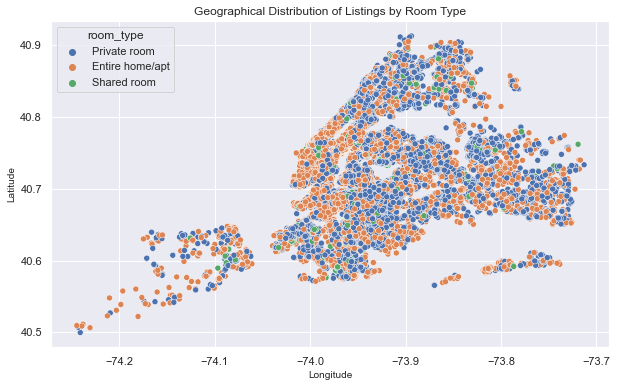

In [131]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x=main_df.longitude, y=main_df.latitude, hue=main_df.room_type)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Listings by Room Type')

# Show the plot
plt.show()

## Latitude and Longitude with room availablity for 365 days


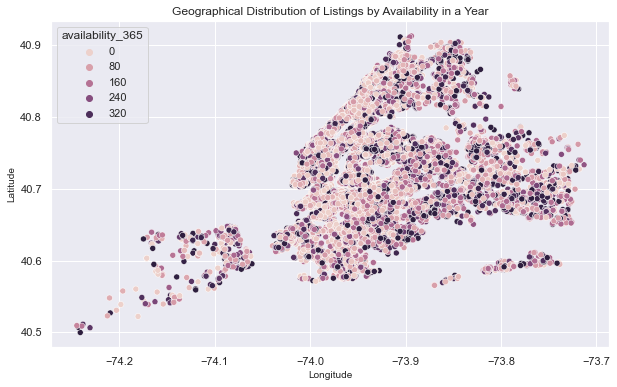

In [133]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x=main_df.longitude, y=main_df.latitude, hue=main_df.availability_365)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Listings by Availability in a Year')

# Show the plot
plt.show()

### Plots


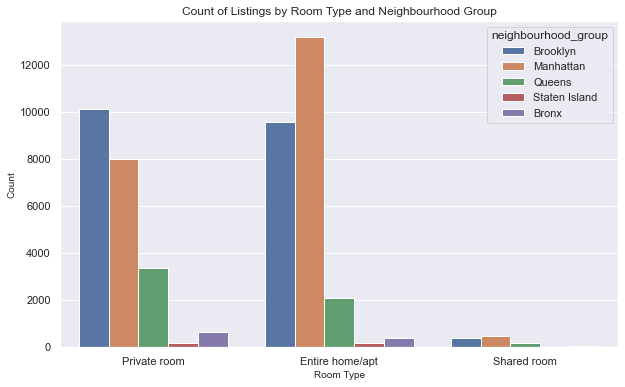

In [135]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(data=main_df, x='room_type', hue='neighbourhood_group')

# Add labels and title
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Count of Listings by Room Type and Neighbourhood Group')

# Show the plot
plt.show()

In Manhattan, home service appears to be the most popular and often used. In New York City, this service is also the most popular.

Private rooms were more frequently utilised in Brooklyn.

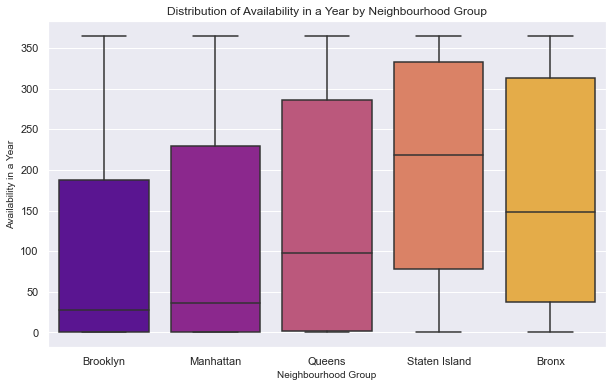

In [137]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot
ax = sns.boxplot(data=main_df, x='neighbourhood_group', y='availability_365', palette='plasma')

# Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Availability in a Year')
plt.title('Distribution of Availability in a Year by Neighbourhood Group')

# Show the plot
plt.show()

Staten Island has th highest average airbnb availablity.



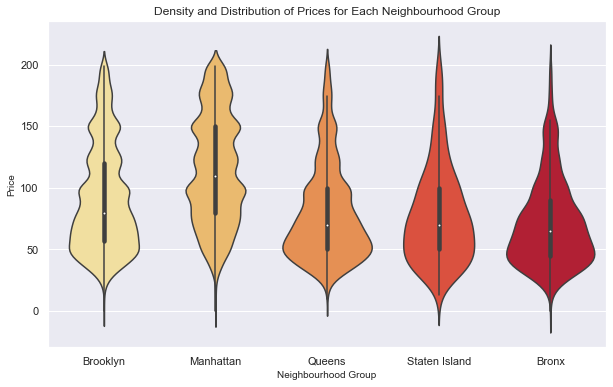

In [140]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the violin plot, limiting the price to under $200 and enhancing the color palette
v2 = sns.violinplot(data=main_df[main_df.price < 200], x='neighbourhood_group', y='price', palette='YlOrRd')

# Add labels and title
v2.set_xlabel('Neighbourhood Group')
v2.set_ylabel('Price')
v2.set_title('Density and Distribution of Prices for Each Neighbourhood Group')

# Show the plot
plt.show()

Manhattan airbnb's has the highest average price.



In [145]:
# Get the top 10 neighbourhoods with the highest number of listings
main_df['neighbourhood'].value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

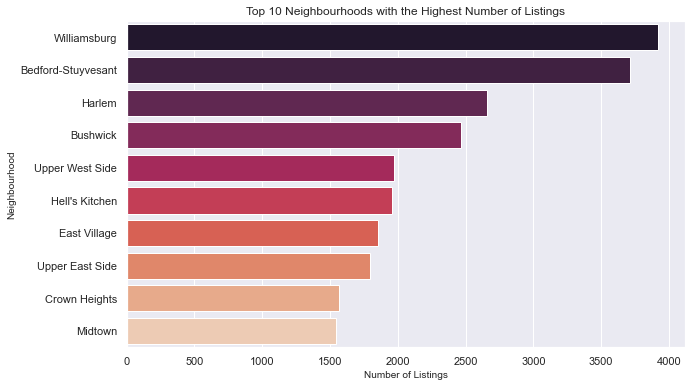

In [142]:
# Get the top 10 neighbourhoods with the highest number of listings
top_neighbourhoods = main_df['neighbourhood'].value_counts().iloc[:10]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot
ax = sns.barplot(x=top_neighbourhoods, y=top_neighbourhoods.index, palette='rocket')

# Add labels and title
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Neighbourhood')
ax.set_title('Top 10 Neighbourhoods with the Highest Number of Listings')

# Show the plot
plt.show()

<Figure size 1440x648 with 0 Axes>

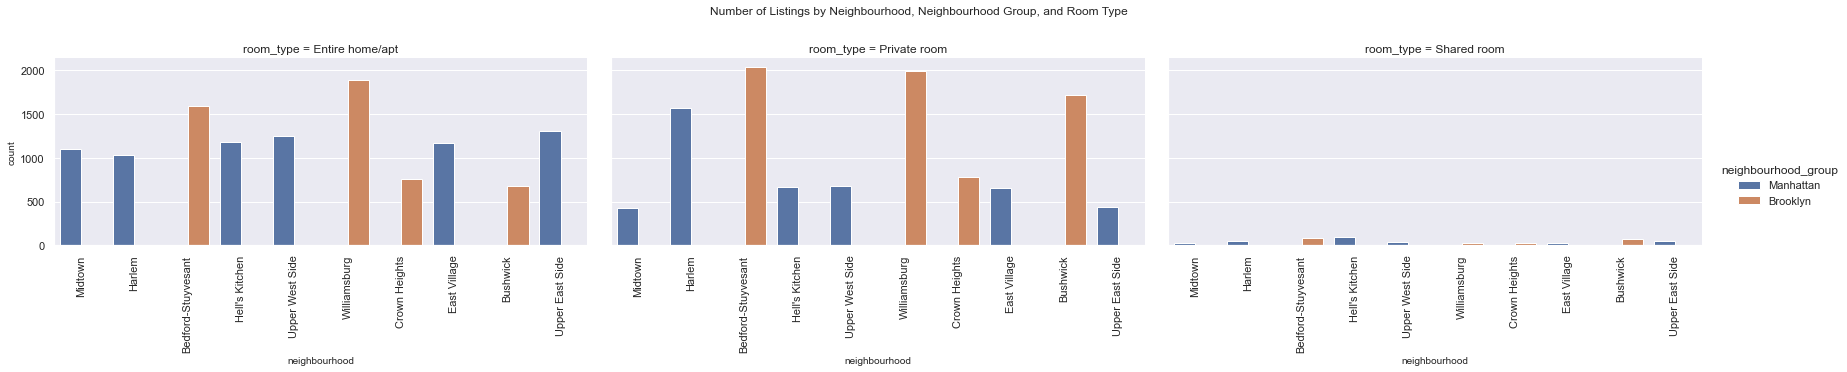

In [152]:
# Filter the neighbourhoods of interest
neighb = main_df.loc[main_df['neighbourhood'].isin(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side', 'Hell\'s Kitchen', 'East Village', 'Upper East Side', 'Crown Heights', 'Midtown'])]

# Set the figure size and create the grouped bar plot
plt.figure(figsize=(20, 9))
pl = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=neighb, kind='count', height=4, aspect=2)

# Rotate the x-axis labels
pl.set_xticklabels(rotation=90)

# Add a title
plt.subplots_adjust(top=0.8)
pl.fig.suptitle('Number of Listings by Neighbourhood, Neighbourhood Group, and Room Type')

# Show the plot
plt.show()

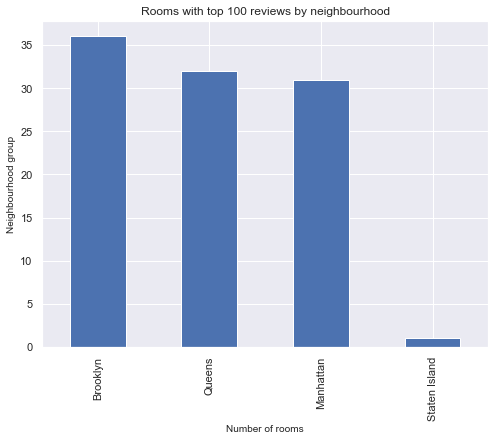

In [161]:
# sort the DataFrame by number_of_reviews column in descending order
dfr = main_df.sort_values(by=['number_of_reviews'], ascending=False)

# select the top 100 rows with highest number of reviews
dfr = dfr.head(100)

# count the number of rooms with top 100 reviews by neighbourhood group
neighbourhood_counts = dfr['neighbourhood_group'].value_counts()

# create a horizontal bar plot of the neighbourhood counts with a figsize of (8, 6)
neighbourhood_counts.plot(kind='bar', figsize=(8, 6))

# set the title of the plot
plt.title('Rooms with top 100 reviews by neighbourhood')

# set the x and y labels
plt.xlabel('Number of rooms')
plt.ylabel('Neighbourhood group')

# display the plot
plt.show()

When it comes to reviews, Brooklyn has the most of the top 100 AirBnBs, followed by Queens and Manhattan.

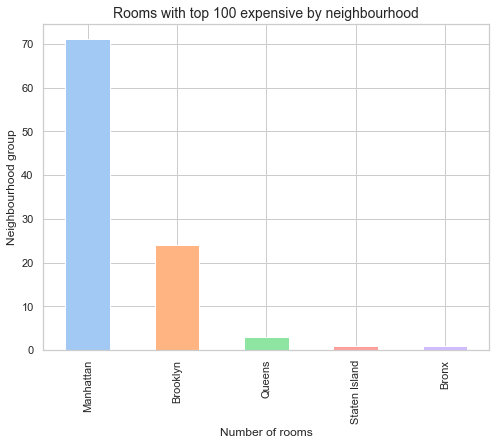

In [164]:
# sort the DataFrame by price column in descending order
dfr = main_df.sort_values(by=['price'], ascending=False)

# select the top 100 rows with highest price
dfr = dfr.head(100)

# count the number of rooms with top 100 expensive by neighbourhood group
neighbourhood_counts = dfr['neighbourhood_group'].value_counts()

# create a horizontal bar plot of the neighbourhood counts with color enhancement
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax = neighbourhood_counts.plot(kind='bar', color=sns.color_palette('pastel'))

# set the title of the plot
ax.set_title('Rooms with top 100 expensive by neighbourhood', fontsize=14)

# set the x and y labels
ax.set_xlabel('Number of rooms', fontsize=12)
ax.set_ylabel('Neighbourhood group', fontsize=12)

# display the plot
plt.show()

If we look at the top 100 Airbnb listings, we see that over 70+ are in Manhattan, with 25 following in Brooklyn.

<Axes: >

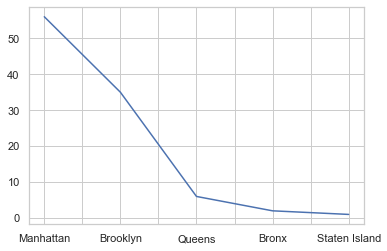

In [168]:
# Rooms with top 100 minimum_nights  by neighbourhood
dfr=main_df.sort_values(by=['minimum_nights'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot()

Manhattan has highest airbnbs with highest minimum nights.



Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

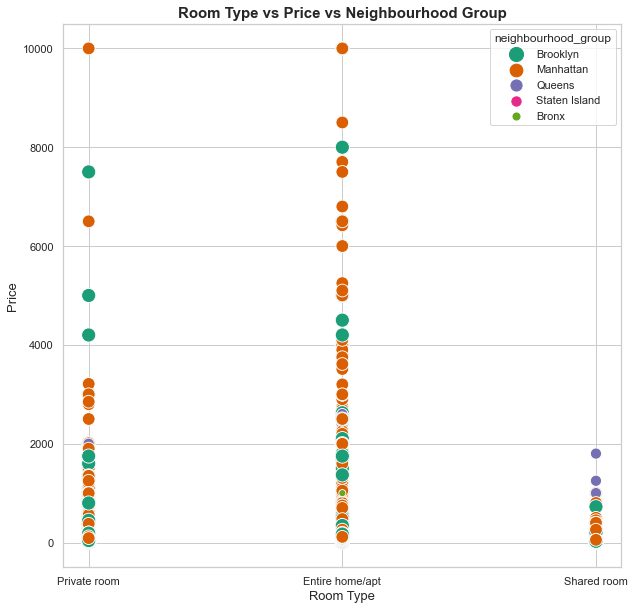

In [170]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=main_df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

## Natural Language Processing


Natural language processing is the study of text to understand how and why people speak as they do. We may use this to examine the names homeowners give their Airbnbs and learn how individuals utilise text characteristics to market their residences.

### Word Count


The frequency of words in names is the first thing we want to examine. This will give us a better idea of how hosts are naming their properties and what terms to look for when searching for an Airbnb.

As soon as we have the names, we make a list of every word that appears in each name.

In [172]:
# Get a list of all names from the 'name' column in the main_df DataFrame
names = main_df['name'].tolist()

# Create an empty list to hold all of the individual words from each name
name_words = []

# Loop over each name in the list of names
for name in names:
    # Convert the name to a string and split it into a list of individual words
    name = str(name).split()
    # Loop over each word in the list of words
    for word in name:
        # Convert the word to lowercase and append it to the name_words list
        name_words.append(word.lower())


We now have a list of every word used in the names. The issue is that many of the phrases we will encounter have little significance to us. Look at the first 30 we come across, for instance.

In [173]:
print(name_words[:30])

['clean', '&', 'quiet', 'apt', 'home', 'by', 'the', 'park', 'skylit', 'midtown', 'castle', 'the', 'village', 'of', 'harlem....new', 'york', '!', 'cozy', 'entire', 'floor', 'of', 'brownstone', 'entire', 'apt:', 'spacious', 'studio/loft', 'by', 'central', 'park', 'large']


Tokens like "by" or "the" that don't actually inform us anything may be seen here. Fortunately, there is a method for us to do away with these terms in the NLTK package for Python (stopwords).

We can see that the stopwords we wished to keep out of our filtered words are no longer present.

Next, we'll employ Python's collections package to swiftly count the words in our list. The term and its frequency can then be added to a dataframe for display.

In [179]:
import nltk # Import the natural language toolkit library

from nltk.corpus import stopwords # Import the stopwords corpus from the nltk library

# Assuming that `name_words` is a list of words that you want to filter
filtered_words = [word for word in name_words if word not in stopwords.words('english')]

# `filtered_words` is a list comprehension that creates a new list of words from `name_words`
# that are not in the list of English stopwords. The `if` statement filters out the stopwords.

print(filtered_words[:30]) # Print the first 30 words in the filtered list


['clean', '&', 'quiet', 'apt', 'home', 'park', 'skylit', 'midtown', 'castle', 'village', 'harlem....new', 'york', '!', 'cozy', 'entire', 'floor', 'brownstone', 'entire', 'apt:', 'spacious', 'studio/loft', 'central', 'park', 'large', 'cozy', '1', 'br', 'apartment', 'midtown', 'east']


In [180]:
from collections import Counter # Import the Counter module from the collections library

# where each tuple contains the word and its frequency
words_count = Counter(filtered_words).most_common()

# Slice the list to get only the top 25 most common words
words_count = words_count[:25]

In [181]:
# Convert the list of tuples to a pandas DataFrame, with the word in the first column and the frequency
# in the second column.
words_df = pd.DataFrame(words_count)

# Print the first 5 rows of the DataFrame to check that it was created correctly
print(words_df.head())

           0     1
0       room  9379
1    bedroom  7231
2    private  6978
3  apartment  6112
4       cozy  4627


Let's change the names of our columns to make this more understandable. The terms are listed in the first column from most common to least common. The count over the complete list of names is displayed in the second column.

In [182]:
# `words_df` is assumed to be a pandas DataFrame with two columns: "Words" and "Count"

# Rename the first column from "0" to "Words" and the second column from "1" to "Count"
words_df.rename(columns={0:"Words", 1:"Count"}, inplace=True)

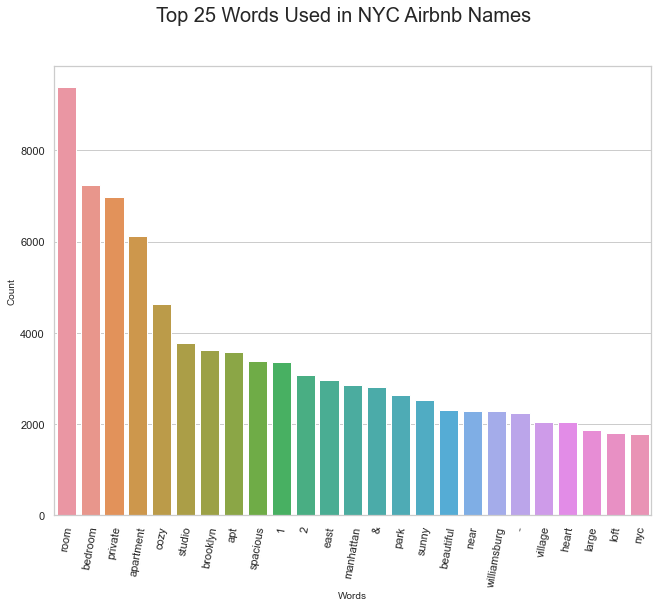

In [185]:
# Create a new figure with a size of 11.7 by 8.27 inches
fig, ax = plt.subplots()
fig.set_size_inches(10.7, 8.27)

# Add a title to the plot
fig.suptitle('Top 25 Words Used in NYC Airbnb Names', fontsize=20)

# Create a barplot of the word counts using seaborn
sns.barplot(x='Words', y='Count', data=words_df, ax=ax)

# Rotate the x-axis labels by 80 degrees to make them easier to read
plt.xticks(rotation=80)

# Show the plot
plt.show()

When we examine the top 25 terms, we may observe some definite tendencies. For starters, hosts are utilising short, precise terms that make it easier for customers to locate their home quickly while conducting a search. With the use of descriptive terms like "bedroom," "private," and "apartment," homeowners may be located and then attempt to entice visitors with appealing images and descriptions. We may also observe the use of terms that entice consumers. Words like "cosy," "spacious," and "beautiful" are frequently used, and with good cause!

### Sentiment Analysis


Let's look at how hosts are calling their properties, paying special attention to the optimism behind the name, because we're on the subject of pleasant-sounding terms. If hosts have a tendency to market their homes more effectively, they can decide to charge extra for having more facilities, being in a better area, etc., all of which can be listed in the name.

In [189]:
# Import the SentimentIntensityAnalyzer from the nltk.sentiment.vader module
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a new instance of the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [190]:
# Initialize an empty list to store our data dictionaries
data = []

# Iterate through each row of our main_df dataframe
for i,row in main_df.iterrows():
    # Initialize a new dictionary for this row's data
    dic = {}

    # Call the SentimentIntensityAnalyzer on this row's 'name' column, and store the resulting scores in a new variable 'ss'
    ss = sid.polarity_scores(str(row['name']))

    # Populate the dictionary with the name, neutral score, positive score, compound score, and price of the property
    dic['name'] = row['name']
    dic['sentiment_neu'] = ss['neu']
    dic['sentiment_pos'] = ss['pos']
    dic['sentiment_compound'] = ss['compound']
    dic['price'] = row['price']

    # Append the dictionary to our list of data
    data.append(dic)


In [191]:
# building our dataframe from the data
sentiment_df = pd.DataFrame(data)
sentiment_df.head()

,name,sentiment_neu,sentiment_pos,sentiment_compound,price
0,Clean & quiet apt home by the park,0.69,0.31,0.4019,149
1,Skylit Midtown Castle,1.00,0.00,0.0000,225
2,THE VILLAGE OF HARLEM....NEW YORK !,1.00,0.00,0.0000,150
3,Cozy Entire Floor of Brownstone,1.00,0.00,0.0000,89
4,Entire Apt: Spacious Studio/Loft by central park,1.00,0.00,0.0000,80


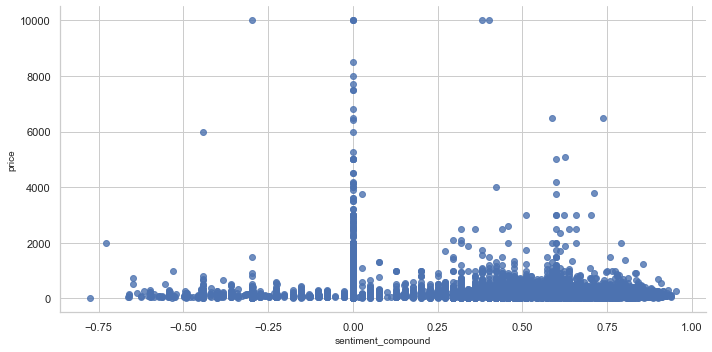

In [196]:
sns.lmplot(x='sentiment_compound', y='price', data=sentiment_df, fit_reg=False, height=5, aspect=2)


We examine how the hosts' set prices for their Airbnbs are impacted by the compound sentiment score, which is determined by the nltk SentimentIntensityAnalyzer as the normalised aggregated score. What we really observe is a bit intriguing: it appears that the majority of Airbnbs with higher prices have better compound scores. This could be the case because hosts use better language in their property names to make it sound better and then raise the fee.

We choose not to utilise this as a feature when regressing for price since we can see that the right side of our plot is quite dense.

## Variable Correlations


The correlation plot between the numerical variables is what we will see next. The only significant association we observe is between the number of reviews and the number of reviews each month.

In [199]:
main_df.corr().style.background_gradient(cmap='coolwarm')
# plt.show()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


## Predicting Price


Regression in pricing is the issue.

Let's test the characteristics with multiple linear regression. Bypassing the features (name, id, host name, and last review). Using Scikit-label Learn's transformer, we convert the categorical variables (neighbourhood group, neighbourhood, and room type) into labels.

Ordinary Least Squares (OLS) Regression is what we employ. 20% of the data are kept back for testing.

In [200]:
'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor


# Preparing the main_df 
main_df.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
main_df['reviews_per_month']=main_df['reviews_per_month'].replace(np.nan, 0)

'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder() # Fit label encoder
le.fit(main_df['neighbourhood_group'])
main_df['neighbourhood_group']=le.transform(main_df['neighbourhood_group']) # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(main_df['neighbourhood'])
main_df['neighbourhood']=le.transform(main_df['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(main_df['room_type'])
main_df['room_type']=le.transform(main_df['room_type'])

main_df.sort_values(by='price',ascending=True,inplace=True)

main_df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,86327101,1,13,40.68258,-73.91284,1,0,1,95,4.35,6,222
25634,15787004,1,28,40.69467,-73.92433,1,0,2,16,0.71,5,0
25433,131697576,0,62,40.83296,-73.88668,1,0,2,55,2.56,4,127
25753,1641537,1,91,40.72462,-73.94072,1,0,2,12,0.53,2,0
23161,8993084,1,13,40.69023,-73.95428,1,0,4,1,0.05,4,28


In [208]:
'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

# Preparing the main_df
#main_df.drop(['name','id','host_name','last_review'],axis=1,inplace=True) # dropping columns that are not needed for modeling
print(main_df.columns)

main_df['reviews_per_month']=main_df['reviews_per_month'].replace(np.nan, 0) # replacing null values in reviews_per_month column with 0

'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder() # Fit label encoder
le.fit(main_df['neighbourhood_group']) # Fit label encoder
main_df['neighbourhood_group']=le.transform(main_df['neighbourhood_group']) # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(main_df['neighbourhood'])
main_df['neighbourhood']=le.transform(main_df['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(main_df['room_type'])
main_df['room_type']=le.transform(main_df['room_type'])

main_df.sort_values(by='price',ascending=True,inplace=True)

main_df.head()


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,86327101,1,13,40.68258,-73.91284,1,0,1,95,4.35,6,222
26259,13709292,2,137,40.75091,-73.97597,0,0,3,0,0.00,1,0
25794,86327101,1,13,40.68173,-73.91342,1,0,1,93,4.28,6,176
25778,10132166,1,214,40.70838,-73.94645,0,0,5,3,0.15,1,73
26841,101970559,1,28,40.69211,-73.90670,2,0,30,2,0.11,6,333


In [210]:
# Train Linear Regression Model
lm = LinearRegression()

# Prepare data
X = main_df[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = main_df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model with the training data
lm.fit(X_train,y_train)

LinearRegression()

We compute the coefficient of determination (R2), mean absolute error (MAE), and root mean square error (RMSE) for assessment.

The average of the absolute errors is known as MAE. MSE stands for mean square error. This increases the penalty for bigger mistakes. We go back to our original units by using the square root to calculate RMSE.

R2 is the percentage of the dependent variable's variation that can be predicted based on the independent variable.

From R2's Scikit documentation:

The residual sum of squares ((y true - y pred)2) is used to determine the coefficient R2 as (1 - u/v).

(((y true - y true.mean())2) is the sum of all squares, and sum() and v represent this.

sum(). The maximum score is 1.0, although it may also be negative (because the model can be arbitrarily worse).

In [211]:
'''Get Predictions & Print Metrics'''

# Make predictions using the trained LRM model
predicts = lm.predict(X_test)

# Print out the evaluation metrics for the LRM model
print("""
        Mean Absolute Error: {}
        Root Mean Squared Error: {}
        R2 Score: {}
    """.format(
        mean_absolute_error(y_test,predicts),
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts),
        ))



        Mean Absolute Error: 77.23008447040941
        Root Mean Squared Error: 263.62360532477584
        R2 Score: 0.0726110100978371
     


We compare the predicted prices from the regressor to the actual prices. This is done to evaluate whether the assumptions of a linear connection are true and to visually assess whether our regression estimates appear good. Here, the assumptions are described in great depth.

Basic presumptions

- Error terms (residuals) are homoscedastic (spread does not expand or shrink) and normally distributed around the regression line.
- When a feature is linearly dependent on other features, there is no multicollinearity.

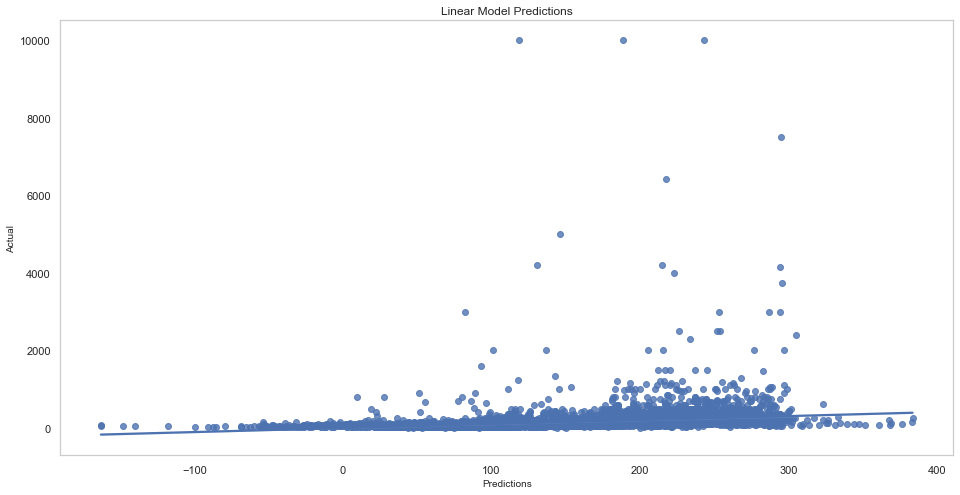

In [215]:
# set the figure size
plt.figure(figsize=(16,8))

# plot a regression plot of the predictions vs the actual prices
sns.regplot(x=predicts, y=y_test)

# set the x and y labels for the plot
plt.xlabel('Predictions')
plt.ylabel('Actual')

# set the title of the plot
plt.title("Linear Model Predictions")

# turn off the grid
plt.grid(False)

# display the plot
plt.show()

Large outliers in the positive direction are something we notice. These listings show those that cost significantly more than anticipated. This can be a sign that they are a scam. Alternatively, there are additional factors, such the facilities and room quality, that contribute to their cost.

This plot reveals some issues: despite their being hundreds of postings, our regressor is noticeably conservative in its price predictions (it doesn't go over 400). Also, we see that it absurdly forecasts negative prices for several postings. Sadly, it appears that the residuals are not equally distributed around the regression line, which may be a sign that the model assumptions are incorrect.

## Diagnostic Plots


Here are a few techniques for creating diagnostic charts that may be used to verify the linearity of the assumptions.

- A plot comparing the residual size to the fitted (predicted) value. Around y=0, we anticipate a Gaussian distribution that is even (homoscedastic).
- A residuals plot versus the presentation of the data. Trends show a major issue if they are present.
- A residual sizes histogram.

In [216]:
# Residuals vs. Fitted
def r_v_fit(m):
    # plot residuals vs. fitted values
    ax = sns.residplot(m.fittedvalues, m.resid)
    plt.title("Residuals vs. Fitted")
    plt.ylabel("Residuals")
    plt.xlabel("Fitted Values")
    plt.show()

# Residuals vs. Order
def r_v_order(m):
    # plot residuals vs. order
    ax = plt.scatter(m.resid.index, m.resid)
    plt.title("Residuals vs. Order")
    plt.ylabel("Residuals")
    plt.xlabel("Order")
    plt.show()

# Histogram
def r_hist(m, binwidth):
    # plot histogram of residuals with specified binwidth
    resid = m.resid
    plt.hist(m.resid, bins=np.arange(min(resid), max(resid) + binwidth, binwidth))
    plt.title("Histogram of Residuals")
    plt.show()


In [256]:
# Get separate dataframe for statsmodels analysis
sm_df = pd.read_csv('AB_NYC_2019 2.csv')

# Split data for training and testing
sm_df['logprice'] = np.log(1 + sm_df['price'])
train_data, test_data = train_test_split(sm_df, test_size=0.2)

In [280]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model using statsmodels
model = smf.ols(
    'price ~ neighbourhood_group + latitude + longitude \
    + room_type + minimum_nights + number_of_reviews + reviews_per_month \
    + calculated_host_listings_count + availability_365',
    data=train_data).fit()

# Print the P-value, R-squared, and adjusted R-squared of the model
print("P-Value:\t{}".format(model.pvalues[0]))
print("R_Squared:\t{}".format(model.rsquared))
print("R_Squared Adj:\t{}".format(model.rsquared_adj))

# Generate and display residual vs. fitted value plot for the test set
r_v_fit(model, X_test, y_test)

# Generate and display residual vs. order plot for the model
r_v_order(model)

# Generate and display histogram of residuals for the model
r_hist(model, 100)


P-Value:	4.1054232288299876e-16
R_Squared:	0.12278135224921594
R_Squared Adj:	0.12241387754742228


PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error converting data to categorical: observation with value 1 does not match any of the expected levels (expected: ['Bronx', 'Brooklyn', ..., 'Queens', 'Staten Island'])
    price ~ neighbourhood_group + latitude + longitude     + room_type + minimum_nights + number_of_reviews + reviews_per_month     + calculated_host_listings_count + availability_365
            ^^^^^^^^^^^^^^^^^^^

The charts up top highlight a few problems with the present model. The residuals vs. fitted plot displays a large number of outliers together with generally positive residuals. Also, the plot seems to be shaped like a cone, which means that it does not satisfy the equal spread requirement for linear regression. Similar to the vs. fitted plot, the residuals vs. order plot exhibits a number of outliers and largely positive values. Finally, the residuals histogram is severely skewed. The above-mentioned outliers are probably to blame for this. Also, the model's R-Squared value, which is given above the residual plots, is extremely low.

Because of the skew in distribution of residuals/number of outliers, it may be useful to attempt a log transformation on the response (price). Let's try the new model out to see how it compares:

In [272]:
# Fitting a new model with a log-transformed price
log_model = smf.ols(
    'logprice ~ neighbourhood_group + latitude + longitude \
    + room_type + minimum_nights + number_of_reviews + reviews_per_month \
    + calculated_host_listings_count + availability_365',
    data=train_data).fit()

print("P-Value:\t{}".format(log_model.pvalues[0]))
print("R_Squared:\t{}".format(log_model.rsquared))
print("R_Squared Adj:\t{}".format(log_model.rsquared_adj))

# Diagnostic Plots for new, transformed model
#r_v_fit(log_model)
r_v_fit(model, X_test, y_test)

def r_v_fit(model, X_test, y_test):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    sns.regplot(x=y_pred, y=residuals, scatter_kws={"alpha": 0.5})
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Fitted Values")
    plt.show()

r_v_order(log_model)
r_hist(log_model, 0.1)

P-Value:	1.82202820343312e-133
R_Squared:	0.5176240000654029
R_Squared Adj:	0.5174219284642315


PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error converting data to categorical: observation with value 1 does not match any of the expected levels (expected: ['Bronx', 'Brooklyn', ..., 'Queens', 'Staten Island'])
    price ~ neighbourhood_group + latitude + longitude     + room_type + minimum_nights + number_of_reviews + reviews_per_month     + calculated_host_listings_count + availability_365
            ^^^^^^^^^^^^^^^^^^^

## Reducing the Model

Now that we have a better model, it may be worth examining to see if any predictors may be removed from the model. The Statsmodels library has great summary statistics, so we can look at the p-value of each of the predictors to see how significant they are:



In [273]:
print(model.pvalues)

Intercept                               4.105423e-16
neighbourhood_group[T.Brooklyn]         8.529228e-02
neighbourhood_group[T.Manhattan]        1.259876e-05
neighbourhood_group[T.Queens]           5.761577e-01
neighbourhood_group[T.Staten Island]    8.833347e-17
room_type[T.Private room]               0.000000e+00
room_type[T.Shared room]                9.597683e-81
latitude                                3.531250e-06
longitude                               1.230969e-33
minimum_nights                          2.816856e-07
number_of_reviews                       1.851344e-12
reviews_per_month                       4.228124e-01
calculated_host_listings_count          4.140637e-02
availability_365                        7.856310e-95
dtype: float64


From the output above, we can observe that just two of the variables—Queens Borough and Reviews Per Month—are not significant predictors of price at a significance level of 𝛼 = 0.05. We may eliminate these predictors one at a time using backwards elimination to check whether our model becomes better. As it has a greater p-value, we may start by deleting reviews each month.

In [279]:
# Fit linear regression model with log-transformed response variable
log_model_1 = smf.ols(
    'logprice ~ neighbourhood_group + latitude + longitude \
    + room_type + minimum_nights + reviews_per_month \
    + calculated_host_listings_count + availability_365',
    data=train_data).fit()

# Print the p-value for the intercept term
print("P-Value:\t{}".format(log_model_1.pvalues[0]))

# Print the R-squared value for the model
print("R_Squared:\t{}".format(log_model_1.rsquared))

# Print the adjusted R-squared value for the model
print("R_Squared Adj:\t{}".format(log_model_1.rsquared_adj))


P-Value:	1.8621266522499672e-129
R_Squared:	0.5166967502490871
R_Squared Adj:	0.516509870085492


Because both  𝑅2
  and  𝑅2𝑎𝑑𝑗
  decreased with the removal of Reviews per Month, we should keep the original log-transformed model and not continue to eliminate predictors. Therefore, we can settle on the following model:

𝑝𝑟𝑖𝑐𝑒ˆ=𝑏0+𝑏1∗𝑛_𝑏𝑟𝑜𝑜𝑘𝑙𝑦𝑛+𝑏2∗𝑛_𝑚𝑎𝑛ℎ𝑎𝑡𝑡𝑎𝑛+𝑏3∗𝑛_𝑞𝑢𝑒𝑒𝑛𝑠+𝑏4∗𝑛_𝑠𝑡𝑎𝑡𝑒𝑛+𝑏5∗𝑙𝑎𝑡𝑖𝑡𝑢𝑑𝑒+𝑏6∗𝑙𝑜𝑛𝑔𝑖𝑡𝑢𝑑𝑒+𝑏7∗𝑟𝑜𝑜𝑚_𝑝𝑟𝑖𝑣𝑎𝑡𝑒+𝑏8∗𝑟𝑜𝑜𝑚_𝑠ℎ𝑎𝑟𝑒𝑑+𝑏9∗𝑚𝑖𝑛𝑖𝑚𝑢𝑚_𝑛𝑖𝑔ℎ𝑡𝑠+𝑏10∗𝑟𝑒𝑣𝑖𝑒𝑤𝑠_𝑝𝑒𝑟_𝑚𝑜𝑛𝑡ℎ+𝑏11∗𝑙𝑖𝑠𝑡𝑖𝑛𝑔𝑠_𝑐𝑜𝑢𝑛𝑡+𝑏12∗𝑎𝑣𝑎𝑖𝑙𝑎𝑏𝑖𝑙𝑖𝑡𝑦
 


We print the coefficients of the model:



In [276]:
model.params

Intercept                              -25875.341914
neighbourhood_group[T.Brooklyn]           -15.150429
neighbourhood_group[T.Manhattan]           34.871511
neighbourhood_group[T.Queens]               4.731396
neighbourhood_group[T.Staten Island]     -135.878448
room_type[T.Private room]                -102.136545
room_type[T.Shared room]                 -136.293258
latitude                                 -145.358712
longitude                                -432.276657
minimum_nights                             -0.357553
number_of_reviews                          -0.183117
reviews_per_month                          -0.615878
calculated_host_listings_count             -0.083564
availability_365                            0.177164
dtype: float64

Longitude, latitude, neighborhood group[T.Staten Island], and room type[T.Shared room] are the most sensitive coefficients. Intriguingly, it makes sense that they are all inversely associated with price. Neighborhood group[T.Manhattan] and Neighborhood group[T.Queens] had the strongest correlations with price.

## Summary

Exploratory data analysis is done while looking at postings from various boroughs, room kinds, and locations. We also utilise natural language processing to examine the top phrases and sentiment used by hosts when naming their properties. After that, we do an ordinary least squares regression on the price and discover some predictive capacity, but the assumptions of linearity are not upheld, indicating a nonlinear connection. When we do a log-linear regression on pricing, we discover that the assumptions are met and that the predicted accuracy has significantly increased. We evaluate each feature's ability to predict outcomes separately.

Expected future plans:

- Explain the model and identify its most powerful explanatory components.
- Attempt a more sophisticated model (Gradient Boosted Regressor). Look closely at each individual high- and low-outlier regressor. Can we locate ripoffs or deals?
- Standardize the data.
- Apply our model/analysis to additional cities.
There you have it, then! Look to the northeast, dormitories, or Staten Island for inexpensive Airbnbs.